In [9]:
!pip install -q matplotlib

In [8]:
!pip  install -q seaborn

In [5]:
!pip install -q nltk

#### Importing modules and dependencies

In [10]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uniab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\uniab\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

#### Load the dataset

In [11]:
df = pd.read_csv("Dataset/training_set_rel3.tsv", sep='\t', encoding='ISO-8859-1');
df.head()

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
0               4               4             NaN              8   
1               5               4             NaN              9   
2               4               3             NaN              7   
3               5               5             NaN             10   
4               4               4             NaN              8   

   rater1_domain2  rater2_domain2  domain2_score  ...  rater2_trait3  \
0             NaN             NaN            NaN  ...            NaN   
1             NaN             NaN            NaN  ...            NaN   
2             NaN             NaN            NaN  ...            NaN   
3             NaN             NaN            NaN  ...            NaN   
4             NaN             NaN            NaN  ...            NaN   

   rater2_trait4  rater2_trait5  rater2_trait6  rater3_trait1  rater3_trait2  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   
2            NaN            NaN            NaN            NaN            NaN   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN            NaN            NaN            NaN   

   rater3_trait3  rater3_trait4  rater3_trait5  rater3_trait6  
0            NaN            NaN            NaN            NaN  
1            NaN            NaN            NaN            NaN  
2            NaN            NaN            NaN            NaN  
3            NaN            NaN            NaN            NaN  
4            NaN            NaN            NaN            NaN  

[5 rows x 28 columns]

In [12]:
df.describe()

essay_id     essay_set  rater1_domain1  rater2_domain1  \
count  12976.000000  12976.000000    12976.000000    12976.000000   
mean   10295.395808      4.179485        4.127158        4.137408   
std     6309.074105      2.136913        4.212544        4.264330   
min        1.000000      1.000000        0.000000        0.000000   
25%     4438.750000      2.000000        2.000000        2.000000   
50%    10044.500000      4.000000        3.000000        3.000000   
75%    15681.250000      6.000000        4.000000        4.000000   
max    21633.000000      8.000000       30.000000       30.000000   

       rater3_domain1  domain1_score  rater1_domain2  rater2_domain2  \
count      128.000000   12976.000000     1800.000000     1800.000000   
mean        37.828125       6.800247        3.333889        3.330556   
std          5.240829       8.970705        0.729103        0.726807   
min         20.000000       0.000000        1.000000        1.000000   
25%         36.000000       2.000000        3.000000        3.000000   
50%         40.000000       3.000000        3.000000        3.000000   
75%         40.000000       8.000000        4.000000        4.000000   
max         50.000000      60.000000        4.000000        4.000000   

       domain2_score  rater1_trait1  ...  rater2_trait3  rater2_trait4  \
count    1800.000000    2292.000000  ...    2292.000000    2292.000000   
mean        3.333889       2.444154  ...       2.635689       2.710297   
std         0.729103       1.211730  ...       1.142566       1.045795   
min         1.000000       0.000000  ...       0.000000       0.000000   
25%         3.000000       2.000000  ...       2.000000       2.000000   
50%         3.000000       2.000000  ...       2.000000       3.000000   
75%         4.000000       3.000000  ...       4.000000       3.000000   
max         4.000000       6.000000  ...       6.000000       6.000000   

       rater2_trait5  rater2_trait6  rater3_trait1  rater3_trait2  \
count     723.000000     723.000000     128.000000     128.000000   
mean        3.777317       3.589212       3.945312       3.890625   
std         0.689401       0.693256       0.643668       0.630390   
min         1.000000       1.000000       2.000000       2.000000   
25%         3.000000       3.000000       4.000000       4.000000   
50%         4.000000       4.000000       4.000000       4.000000   
75%         4.000000       4.000000       4.000000       4.000000   
max         6.000000       6.000000       6.000000       6.000000   

       rater3_trait3  rater3_trait4  rater3_trait5  rater3_trait6  
count     128.000000     128.000000     128.000000     128.000000  
mean        4.078125       3.992188       3.843750       3.617188  
std         0.622535       0.509687       0.538845       0.603417  
min         2.000000       3.000000       2.000000       2.000000  
25%         4.000000       4.000000       4.000000       3.000000  
50%         4.000000       4.000000       4.000000       4.000000  
75%         4.000000       4.000000       4.000000       4.000000  
max         6.000000       6.000000       5.000000       5.000000  

[8 rows x 27 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [14]:
df.shape

(12976, 28)

In [15]:
df.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [17]:
df[df['essay_set']==5]

essay_id  essay_set                                              essay  \
7079     11827          5  In this memoir of Narciso Rodriguez, @PERSON3'...   
7080     11828          5  Throughout the excerpt from Home the Blueprint...   
7081     11829          5  The mood the author created in the memoir is l...   
7082     11830          5  The mood created by the author is showing how ...   
7083     11831          5  The mood created in the memoir is happiness an...   
...        ...        ...                                                ...   
8879     13627          5  The mood of this memoir is nonfiction. The moo...   
8880     13628          5  The mood was created by the author in the memo...   
8881     13629          5  In the memoir "Narciso Rodriguez", the mood cr...   
8882     13630          5  The mood created @CAPS3 the author, Narciso Ro...   
8883     13631          5  The author created such a specific mood for th...   

      rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
7079               2               2             NaN              2   
7080               2               2             NaN              2   
7081               3               3             NaN              3   
7082               1               0             NaN              1   
7083               2               3             NaN              3   
...              ...             ...             ...            ...   
8879               2               1             NaN              2   
8880               0               0             NaN              0   
8881               3               4             NaN              4   
8882               3               2             NaN              3   
8883               2               2             NaN              2   

      rater1_domain2  rater2_domain2  domain2_score  ...  rater2_trait3  \
7079             NaN             NaN            NaN  ...            NaN   
7080             NaN             NaN            NaN  ...            NaN   
7081             NaN             NaN            NaN  ...            NaN   
7082             NaN             NaN            NaN  ...            NaN   
7083             NaN             NaN            NaN  ...            NaN   
...              ...             ...            ...  ...            ...   
8879             NaN             NaN            NaN  ...            NaN   
8880             NaN             NaN            NaN  ...            NaN   
8881             NaN             NaN            NaN  ...            NaN   
8882             NaN             NaN            NaN  ...            NaN   
8883             NaN             NaN            NaN  ...            NaN   

      rater2_trait4  rater2_trait5  rater2_trait6  rater3_trait1  \
7079            NaN            NaN            NaN            NaN   
7080            NaN            NaN            NaN            NaN   
7081            NaN            NaN            NaN            NaN   
7082            NaN            NaN            NaN            NaN   
7083            NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...   
8879            NaN            NaN            NaN            NaN   
8880            NaN            NaN            NaN            NaN   
8881            NaN            NaN            NaN            NaN   
8882            NaN            NaN            NaN            NaN   
8883            NaN            NaN            NaN            NaN   

      rater3_trait2  rater3_trait3  rater3_trait4  rater3_trait5  \
7079            NaN            NaN            NaN            NaN   
7080            NaN            NaN            NaN            NaN   
7081            NaN            NaN            NaN            NaN   
7082            NaN            NaN            NaN            NaN   
7083            NaN            NaN            NaN            NaN   
...             ...            ...            ...            ...  

In [18]:
df.dropna(axis=1,inplace=True)

In [19]:
df.shape

(12976, 6)

In [20]:
df.head()

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   rater1_domain1  rater2_domain1  domain1_score  
0               4               4              8  
1               5               4              9  
2               4               3              7  
3               5               5             10  
4               4               4              8

In [21]:
df['essay_set'].value_counts()

essay_set
5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
7    1569
8     723
Name: count, dtype: int64

In [22]:
df.drop(columns=['rater1_domain1','rater2_domain1'],inplace=True,axis=1)

In [23]:
df.shape

(12976, 4)

In [25]:
df.head(15)

essay_id  essay_set                                              essay  \
0          1          1  Dear local newspaper, I think effects computer...   
1          2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2          3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3          4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4          5          1  Dear @LOCATION1, I know having computers has a...   
5          6          1  Dear @LOCATION1, I think that computers have a...   
6          7          1  Did you know that more and more people these d...   
7          8          1  @PERCENT1 of people agree that computers make ...   
8          9          1  Dear reader, @ORGANIZATION1 has had a dramatic...   
9         10          1  In the @LOCATION1 we have the technology of a ...   
10        11          1  Dear @LOCATION1, @CAPS1 people acknowledge the...   
11        12          1  Dear @CAPS1 @CAPS2 I feel that computers do ta...   
12        13          1  Dear local newspaper I raed ur argument on the...   
13        14          1  My three detaileds for this news paper article...   
14        15          1  Dear, In this world today we should have every...   

    domain1_score  
0               8  
1               9  
2               7  
3              10  
4               8  
5               8  
6              10  
7              10  
8               9  
9               9  
10              8  
11              8  
12              7  
13              6  
14              6

In [26]:
min(df['domain1_score'])

0

In [27]:
max(df['domain1_score'])

60

In [ ]:
df.kurtosis()

essay_id        -1.174375
essay_set       -1.151431
domain1_score    6.077899
dtype: float64

C:\Users\uniab\AppData\Local\Temp\ipykernel_16052\114848998.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['domain1_score'])


<Axes: xlabel='domain1_score', ylabel='Density'>

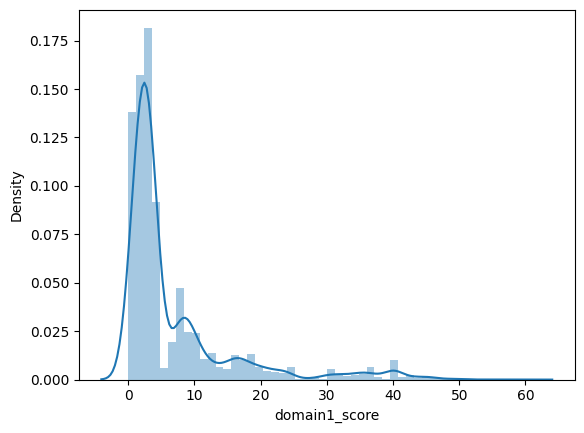

In [29]:
#Check Skewness
sns.distplot(df['domain1_score'])

In [30]:
df[df['essay_set']==5]['domain1_score']

7079    2
7080    2
7081    3
7082    1
7083    3
       ..
8879    2
8880    0
8881    4
8882    3
8883    2
Name: domain1_score, Length: 1805, dtype: int64

### Normalization on the dataset

In [31]:
min_range = [2,1,0,0,0,0,0,0]
max_range = [12,6,3,3,4,4,30,60]

def normalize(x,mi,ma):
    print("Before Normalization: "+str(x))
    x = (x-mi)/(ma-mi)
    print("After Normalization : "+str(x))
    return round(x*10)

df['final_score']=df.apply(lambda x:normalize(x['domain1_score'],min_range[x['essay_set']-1],max_range[x['essay_set']-1]),axis=1)

Before Normalization: 8
After Normalization : 0.6
Before Normalization: 9
After Normalization : 0.7
Before Normalization: 7
After Normalization : 0.5
Before Normalization: 10
After Normalization : 0.8
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 10
After Normalization : 0.8
Before Normalization: 10
After Normalization : 0.8
Before Normalization: 9
After Normalization : 0.7
Before Normalization: 9
After Normalization : 0.7
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 7
After Normalization : 0.5
Before Normalization: 6
After Normalization : 0.4
Before Normalization: 6
After Normalization : 0.4
Before Normalization: 12
After Normalization : 1.0
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 8
After Normalization : 0.6
Before Normalization: 4
After Normalization : 0.2
Before Normalization: 6
After Normalization : 

In [32]:
df['final_score']

0        6
1        7
2        5
3        8
4        6
        ..
12971    6
12972    5
12973    7
12974    7
12975    7
Name: final_score, Length: 12976, dtype: int64

C:\Users\uniab\AppData\Local\Temp\ipykernel_16052\3249593394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['final_score'])


<Axes: xlabel='final_score', ylabel='Density'>

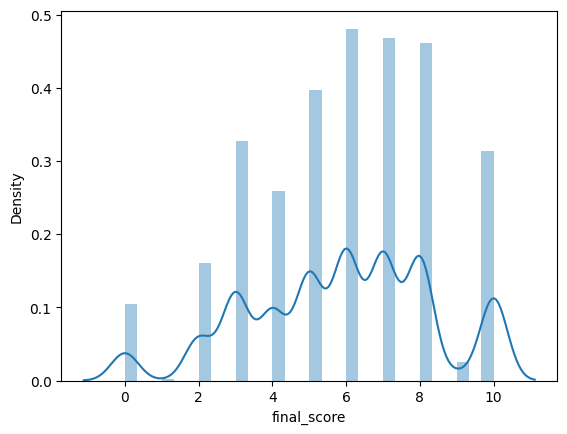

In [33]:
sns.distplot(df['final_score'])

In [35]:
df.head()

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   domain1_score  final_score  
0              8            6  
1              9            7  
2              7            5  
3             10            8  
4              8            6

In [36]:
df.describe()

essay_id     essay_set  domain1_score   final_score
count  12976.000000  12976.000000   12976.000000  12976.000000
mean   10295.395808      4.179485       6.800247      5.849877
std     6309.074105      2.136913       8.970705      2.466040
min        1.000000      1.000000       0.000000      0.000000
25%     4438.750000      2.000000       2.000000      4.000000
50%    10044.500000      4.000000       3.000000      6.000000
75%    15681.250000      6.000000       8.000000      8.000000
max    21633.000000      8.000000      60.000000     10.000000

In [37]:
df.drop('domain1_score',axis=1,inplace=True)

In [38]:
df.head()

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   final_score  
0            6  
1            7  
2            5  
3            8  
4            6

**Text PRE_PROCESSING using various techniques**

In [39]:
def clean_essay(essay):
    x=[]
    for i in essay.split():
        if i.startswith("@"):
            continue
        else:
            x.append(i)
    return ' '.join(x)

df['essay'] = df['essay'].apply(lambda x:clean_essay(x))

In [40]:
stop_words = set(stopwords.words('english')) 
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay) 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return ' '.join(filtered_sentence)

df['clean_essay'] = df['essay'].apply(lambda x:remove_stop_words(x))

In [41]:
def remove_puncs(essay):
    essay = re.sub("[^A-Za-z ]","",essay)
    return essay

df['clean_essay'] = df['clean_essay'].apply(lambda x:remove_puncs(x))

In [42]:
df.head()

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear I believe that using computers will benef...   
2         3          1  Dear, More and more people use computers, but ...   
3         4          1  Dear Local Newspaper, I have found that many e...   
4         5          1  Dear I know having computers has a positive ef...   

   final_score                                        clean_essay  
0            6  Dear local newspaper  I think effects computer...  
1            7  Dear I believe using computers benefit us many...  
2            5  Dear  More people use computers  everyone agre...  
3            8  Dear Local Newspaper  I found many experts say...  
4            6  Dear I know computers positive effect people  ...

In [ ]:
import re
import nltk

# Download the required NLTK resources
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

### Different text-metrices

In [43]:
def sent2word(x):
    x=re.sub("[^A-Za-z0-9]"," ",x)
    words=nltk.word_tokenize(x)
    return words

def essay2word(essay):
    essay = essay.strip()
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw = tokenizer.tokenize(essay)
    final_words=[]
    for i in raw:
        if(len(i)>0):
            final_words.append(sent2word(i))
    return final_words
        

def noOfWords(essay):
    count=0
    for i in essay2word(essay):
        count=count+len(i)
    return count

def noOfChar(essay):
    count=0
    for i in essay2word(essay):
        for j in i:
            count=count+len(j)
    return count

def avg_word_len(essay):
    return noOfChar(essay)/noOfWords(essay)

def noOfSent(essay):
    return len(essay2word(essay))

def count_pos(essay):
    sentences = essay2word(essay)
    noun_count=0
    adj_count=0
    verb_count=0
    adverb_count=0
    for i in sentences:
        pos_sentence = nltk.pos_tag(i)
        for j in pos_sentence:
            pos_tag = j[1]
            if(pos_tag[0]=='N'):
                noun_count+=1
            elif(pos_tag[0]=='V'):
                verb_count+=1
            elif(pos_tag[0]=='J'):
                adj_count+=1
            elif(pos_tag[0]=='R'):
                adverb_count+=1
    return noun_count,verb_count,adj_count,adverb_count

data = open('big.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    essay=essay.lower()
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count+=1
    return count
    
    

In [44]:
df.head()

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear I believe that using computers will benef...   
2         3          1  Dear, More and more people use computers, but ...   
3         4          1  Dear Local Newspaper, I have found that many e...   
4         5          1  Dear I know having computers has a positive ef...   

   final_score                                        clean_essay  
0            6  Dear local newspaper  I think effects computer...  
1            7  Dear I believe using computers benefit us many...  
2            5  Dear  More people use computers  everyone agre...  
3            8  Dear Local Newspaper  I found many experts say...  
4            6  Dear I know computers positive effect people  ...

**Pre-processed Dataset with clean corpus of prompts and tokens**

In [ ]:
pro_data = df.copy()
pro_data['char_count'] = pro_data['essay'].apply(noOfChar)
pro_data['word_count'] = pro_data['essay'].apply(noOfWords)
pro_data['sent_count'] = pro_data['essay'].apply(noOfSent)
pro_data['avg_word_len'] = pro_data['essay'].apply(avg_word_len)
pro_data['spell_err_count'] = pro_data['essay'].apply(check_spell_error)
pro_data['noun_count'], pro_data['adj_count'], pro_data['verb_count'], pro_data['adv_count'] = zip(*pro_data['essay'].map(count_pos))
pro_data.to_csv("Processed_dataset.csv")

In [ ]:
prep_df = pd.read_csv("Processed_dataset.csv")
prep_df.drop('Unnamed: 0',inplace=True,axis=1)
prep_df.head()

essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear I believe that using computers will benef...   
2         3          1  Dear, More and more people use computers, but ...   
3         4          1  Dear Local Newspaper, I have found that many e...   
4         5          1  Dear I know having computers has a positive ef...   

   final_score                                        clean_essay  char_count  \
0            6  Dear local newspaper  I think effects computer...        1441   
1            7  Dear I believe using computers benefit us many...        1765   
2            5  Dear  More people use computers  everyone agre...        1185   
3            8  Dear Local Newspaper  I found many experts say...        2284   
4            6  Dear I know computers positive effect people  ...        2023   

   word_count  sent_count  avg_word_len  spell_err_count  noun_count  \
0         344          16      4.188953               11          76   
1         413          17      4.273608               21          98   
2         276          14      4.293478                5          76   
3         490          26      4.661224               31         142   
4         469          30      4.313433               18         110   

   adj_count  verb_count  adv_count  
0         75          18         24  
1         84          20         19  
2         51          20         16  
3         96          39         29  
4         90          32         36